In [85]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd

In [86]:
#Generate dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, random_state=0, n_clusters_per_class=1, n_redundant=0)
print(X.shape, y.shape)

(100, 2) (100,)


In [87]:
#Make it into dataframe format
y = y.reshape(-1,1)
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.tail()

,x1,x2,y
95,1.433701,0.884266,1
96,0.509188,1.161563,1
97,0.895460,-0.290898,0
98,-0.182897,0.741391,1
99,3.219972,0.952681,1


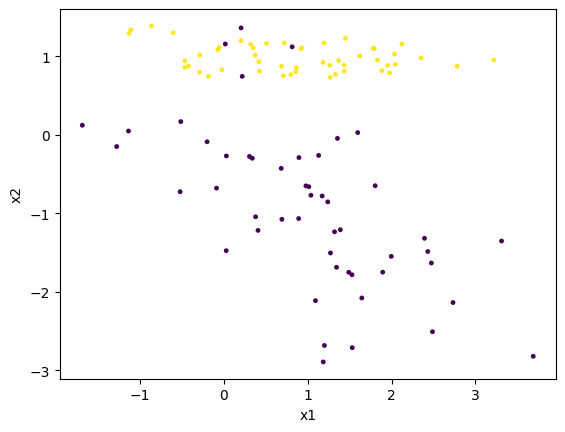

In [88]:
plt.scatter(df['x1'], df['x2'], c=df['y'], s=6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Train Logistic Regression using Gradient descent**

In [89]:
#Define Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X,w):
    return sigmoid(np.dot(X,w))

def cost_function(X,y,w):
    m = X.shape[0]
    h = predict(X,w)
    cost = -(1/m)*np.sum(y*np.log(h) + (1-y)* np.log(1-h))
    return cost

def gradient(X,y,w):
    m = X.shape[0]
    h = predict(X,w)
    dw = (1/m) * np.dot(X.T, h-y)
    #dw = np.dot(X.T, h-y)/m
    return dw

def gradient_descent(x,y,alpha,epochs):
    X = np.hstack((np.ones((x.shape[0],1)),x))
    w = np.zeros((X.shape[1],1))
    cost = []
    for i in range(epochs):
        dw = gradient(X,y,w)
        w = w - alpha * dw
        cost.append(cost_function(X,y,w))
    return w,cost

In [90]:
#Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(x_train.shape)

(70, 2)


Decision Boundary: -2.3405 + 1.1420x1 + 4.5255x2 = 0


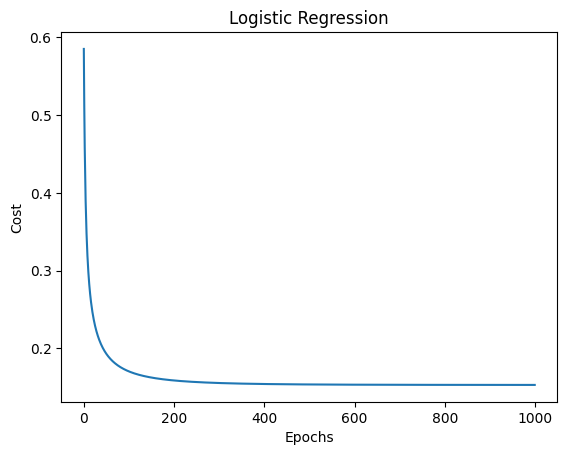

In [91]:
#Training process
w, cost = gradient_descent(x_train, y_train, 0.5, 1000)
print('Decision Boundary: %.4f + %.4fx1 + %.4fx2 = 0'%(w[0,0],w[1,0],w[2,0]))
#Plot
plt.plot(cost)
plt.title('Logistic Regression')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

[-1.6894137543326657, 3.6912216908338134]
[0.9435144497622376, -0.41427943249872634]


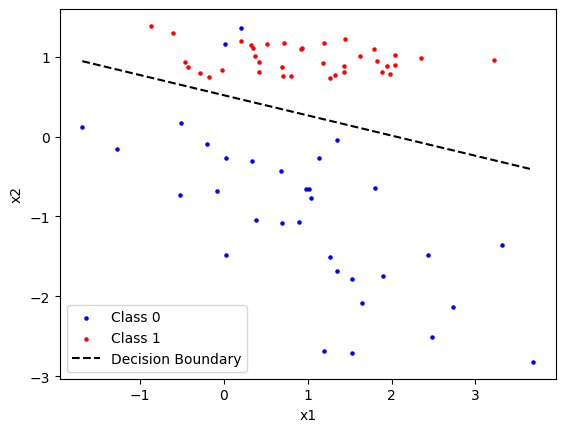

In [92]:
#plot decision boundary
x1_min, x1_max = X[:, 0].min() , X[:,0].max()
x_val = [x1_min,x1_max]
print(x_val)
y_val = [-(w[0,0] + w[1,0]*x)/w[2,0] for x in x_val]
print(y_val)
plt.scatter(x_train[y_train.flatten()==0][:,0],x_train[y_train.flatten()==0][:,1], c='b', s=5)
plt.scatter(x_train[y_train.flatten()==1][:,0],x_train[y_train.flatten()==1][:,1], c='r', s=5)
plt.plot(x_val, y_val, 'k--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Class 0', 'Class 1', 'Decision Boundary'])
plt.show()

In [93]:
#Evaluate model
from sklearn.metrics import accuracy_score
X_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))
y_pred = predict(X_test,w)
y_pred = y_pred>0.5
print('Accuracy: %.4f%%'%(100*accuracy_score(y_pred,y_test)))

Accuracy: 93.3333%


**Train Logistic Regression using Sklearn**

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train.flatten())
print('Decision Boundary: %.4f + %.4fx1 + %.4fx2 = 0'%(model.intercept_[0], model.coef_[0][0],model.coef_[0][1]))

Decision Boundary: -1.0684 + 0.6627x1 + 2.6959x2 = 0


[-1.6894137543326657, 3.6912216908338134]
[0.8115824571947099, -0.5110998916315226]


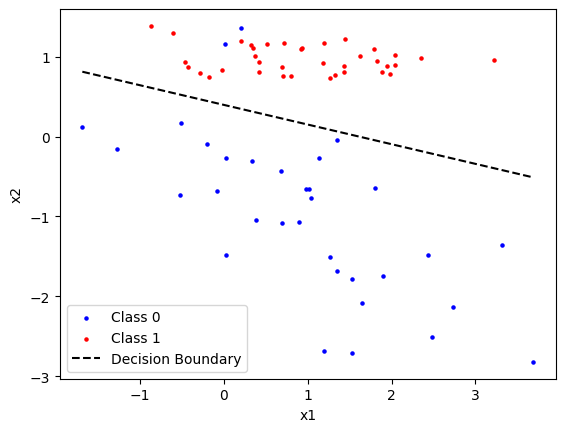

In [95]:
#plot decision boundary
x1_min, x1_max = X[:, 0].min() , X[:,0].max()
x_val = [x1_min,x1_max]
print(x_val)
y_val = [-(model.intercept_[0] + model.coef_[0][0]*x)/model.coef_[0][1] for x in x_val]
print(y_val)
plt.scatter(x_train[y_train.flatten()==0][:,0],x_train[y_train.flatten()==0][:,1], c='b', s=5)
plt.scatter(x_train[y_train.flatten()==1][:,0],x_train[y_train.flatten()==1][:,1], c='r', s=5)
plt.plot(x_val, y_val, 'k--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Class 0', 'Class 1', 'Decision Boundary'])
plt.show()

Accuracy: 90.0000%


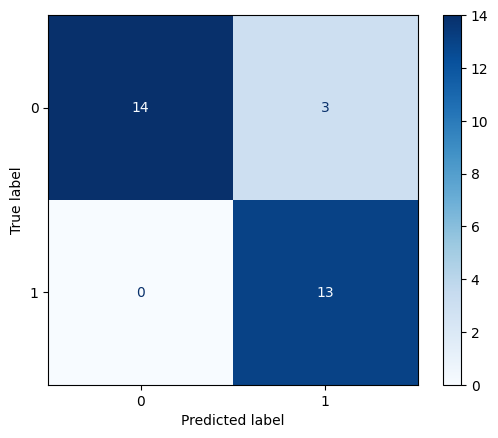

In [96]:
y_pred = model.predict(x_test)
print('Accuracy: %.4f%%'%(100*accuracy_score(y_pred,y_test)))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test.flatten(),cmap='Blues')

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.81      1.00      0.90        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



[0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
[0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0]
Accuracy: 80.0000%
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.68      1.00      0.81        13

    accuracy                           0.80        30
   macro avg       0.84      0.82      0.80        30
weighted avg       0.86      0.80      0.80        30



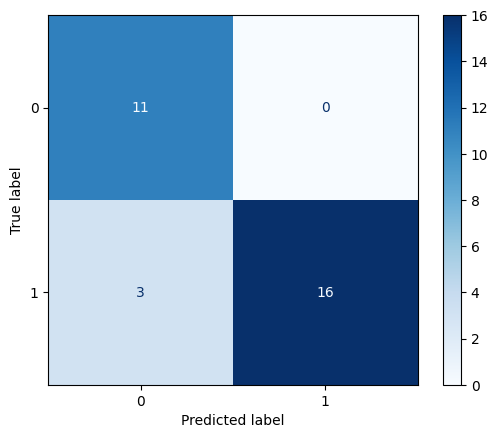

In [103]:
#Unsupervised Learning using K-Means Clustering
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(x_train)
yhat_test = kmeans_model.predict(x_test)
print(yhat_test)
print(y_test.flatten())
print('Accuracy: %.4f%%'%(100*accuracy_score(yhat_test,y_test.flatten())))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, x_test, yhat_test.flatten(), cmap='Blues')
print(classification_report(y_test, yhat_test))